In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = r"C:\Users\Student\Desktop\2023_nba_player_stats.csv"
data = pd.read_csv(file_path)

In [4]:
print(data.head())
print(data.info())

                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   DD2  TD3  +/-  HR  Accel_X  Accel_Y  Accel_Z  Gyro_X  Gyro_Y  Gyro_Z  
0   31    1  470  70     0.12    -0.34     0.56    0.78   -0.67    0.45  
1   39    1  424  72     0.23     0.45    -0.12    1.23    0.67   -0.56  
2   36   10  128  88    -0.15     0.67     0.43   -1.34    1.23    0.34  
3    3    0  149  75     0.45    -0.82     0.12    0.67   -0.78    1.23  
4   46    6  341  92     0.34     0.23    -0.67    0.45    1.12   -0.45  

[5 rows x 37 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54

In [5]:
data.dropna(inplace=True)

In [6]:
columns_to_keep = ['PName', 'Team', 'Age', 'GP', 'W', 'PTS', 'AST', 'STL', 'HR',
                   'Accel_X', 'Accel_Y', 'Accel_Z']
data = data[columns_to_keep]

In [7]:
correlation_matrix = data[['PTS', 'AST', 'STL', 'HR', 'Accel_X', 'Accel_Y', 'Accel_Z']].corr()

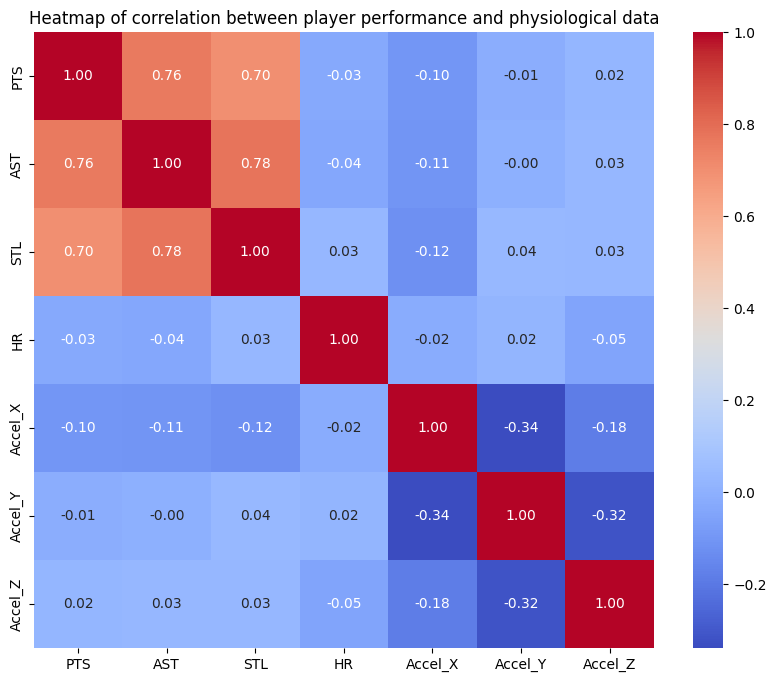

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of correlation between player performance and physiological data")
plt.show()


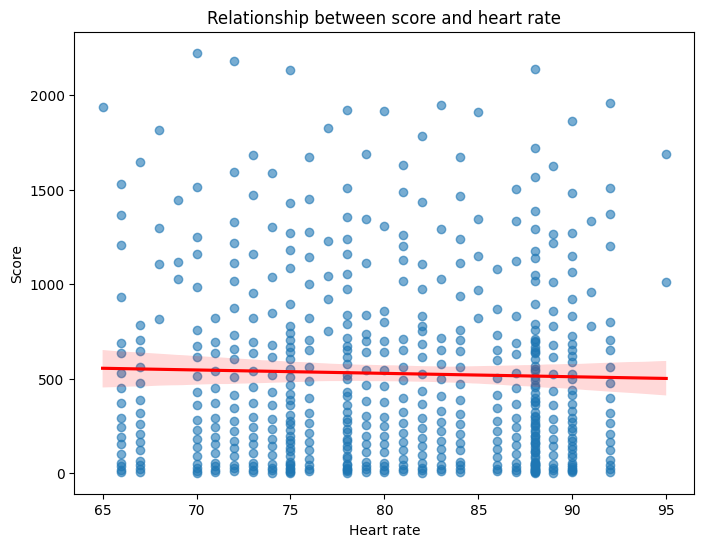

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(x='HR', y='PTS', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Relationship between score and heart rate")
plt.xlabel("Heart rate")
plt.ylabel("Score")
plt.show()

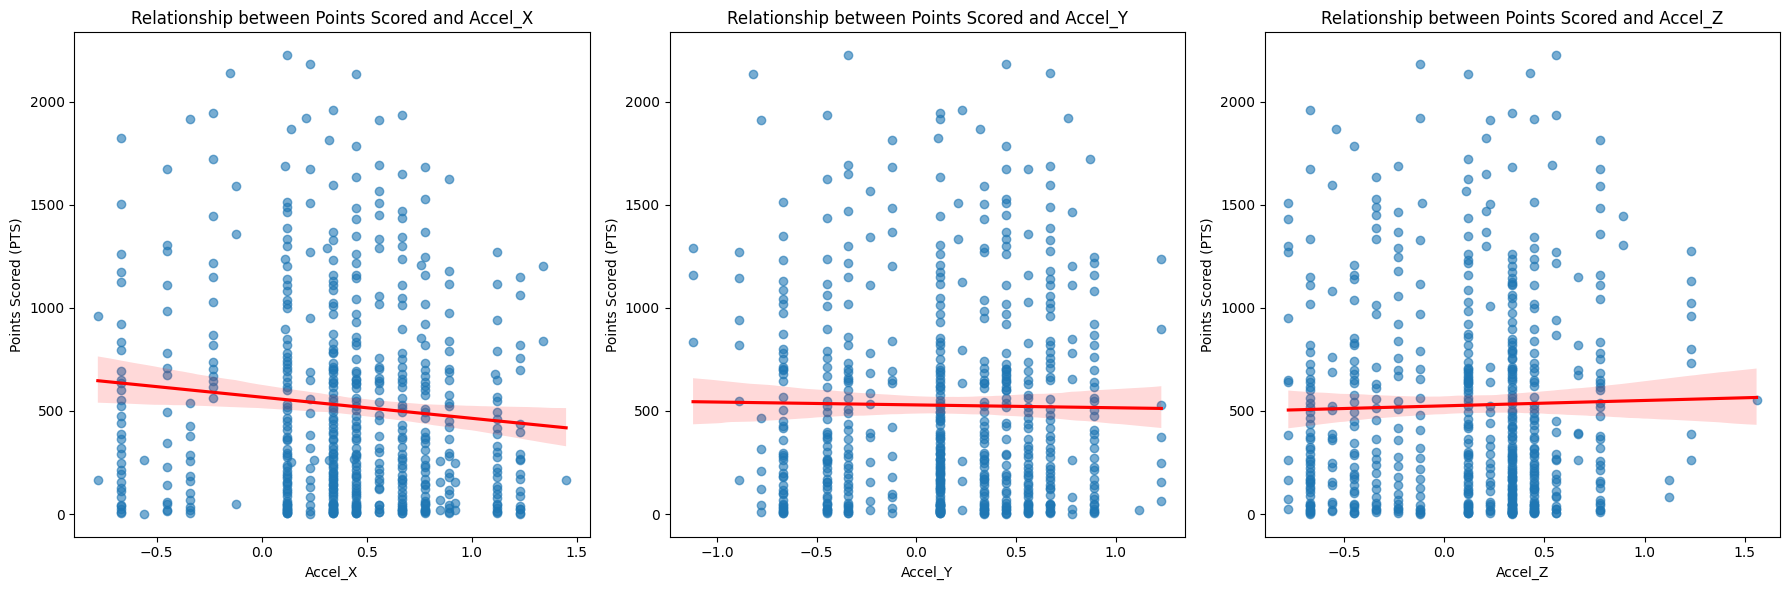

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, accel in enumerate(['Accel_X', 'Accel_Y', 'Accel_Z']):
    sns.regplot(x=accel, y='PTS', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f"Relationship between Points Scored and {accel}")
    axes[i].set_xlabel(accel)
    axes[i].set_ylabel("Points Scored (PTS)")
plt.tight_layout()
plt.show()

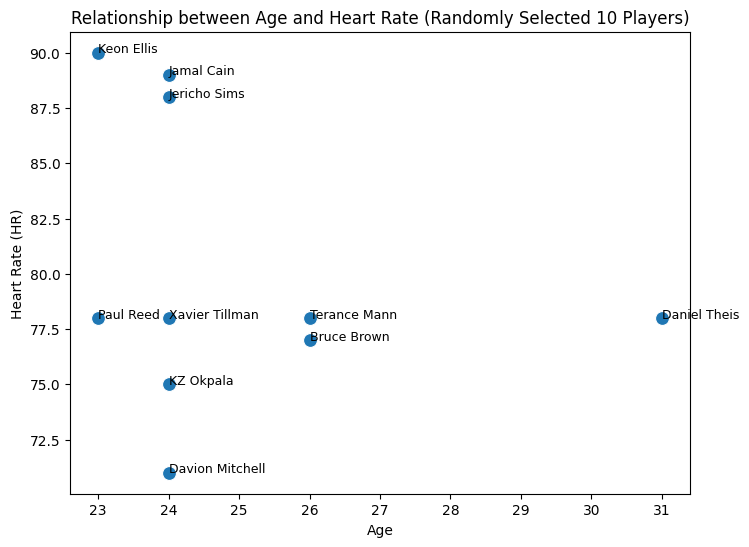

In [11]:
sample_data = data.sample(10)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='HR', data=sample_data, s=100)
for i in range(len(sample_data)):
    plt.text(sample_data['Age'].iloc[i], sample_data['HR'].iloc[i], sample_data['PName'].iloc[i], fontsize=9)
plt.title("Relationship between Age and Heart Rate (Randomly Selected 10 Players)")
plt.xlabel("Age")
plt.ylabel("Heart Rate (HR)")
plt.show()

In [12]:
data['FP'] = data[['PTS', 'AST', 'STL']].mean(axis=1)

In [13]:
team_stats = data.groupby('Team')['FP'].describe()

C:\Users\Student\AppData\Local\Temp\ipykernel_14060\1304611243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team', y='FP', data=data, palette='Set3')


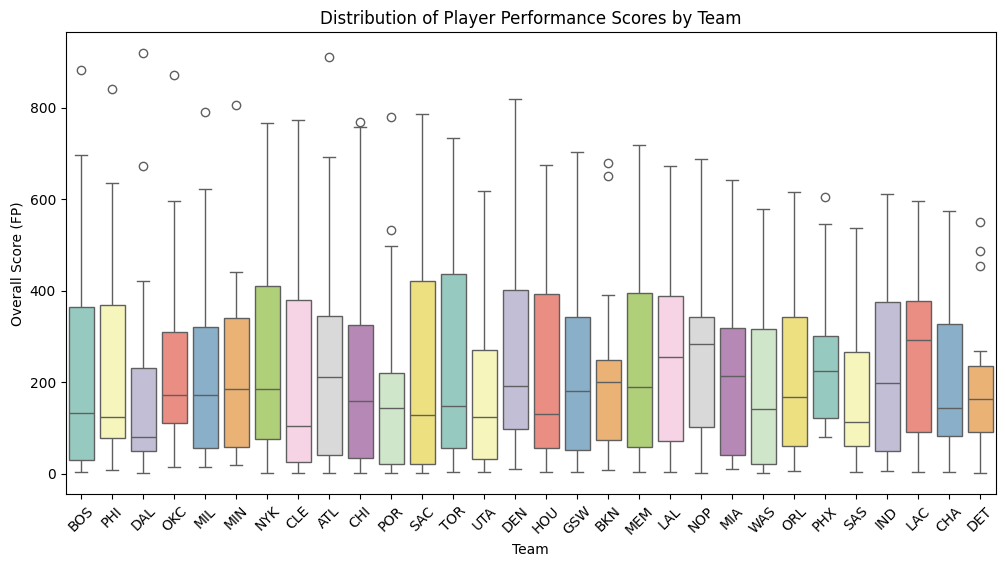

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Team', y='FP', data=data, palette='Set3')
plt.title("Distribution of Player Performance Scores by Team")
plt.xlabel("Team")
plt.ylabel("Overall Score (FP)")
plt.xticks(rotation=45)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
data['WinRate'] = data['W'] / data['GP']
data['FP'] = data[['PTS', 'AST', 'STL']].mean(axis=1)

In [17]:
team_features = data.groupby('Team').agg({
    'FP': 'mean',
    'WinRate': 'mean',
    'PTS': 'mean',
    'AST': 'mean',
    'STL': 'mean'
}).reset_index()

In [18]:
np.random.seed(42)
team_features['Champion'] = np.random.randint(0, 2, size=team_features.shape[0])

In [19]:
X = team_features[['FP', 'WinRate', 'PTS', 'AST', 'STL']]
y = team_features['Champion']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = rf_model.predict(X_test)

In [31]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest model accuracy: {accuracy:.2f}")

Random Forest model accuracy: 0.50


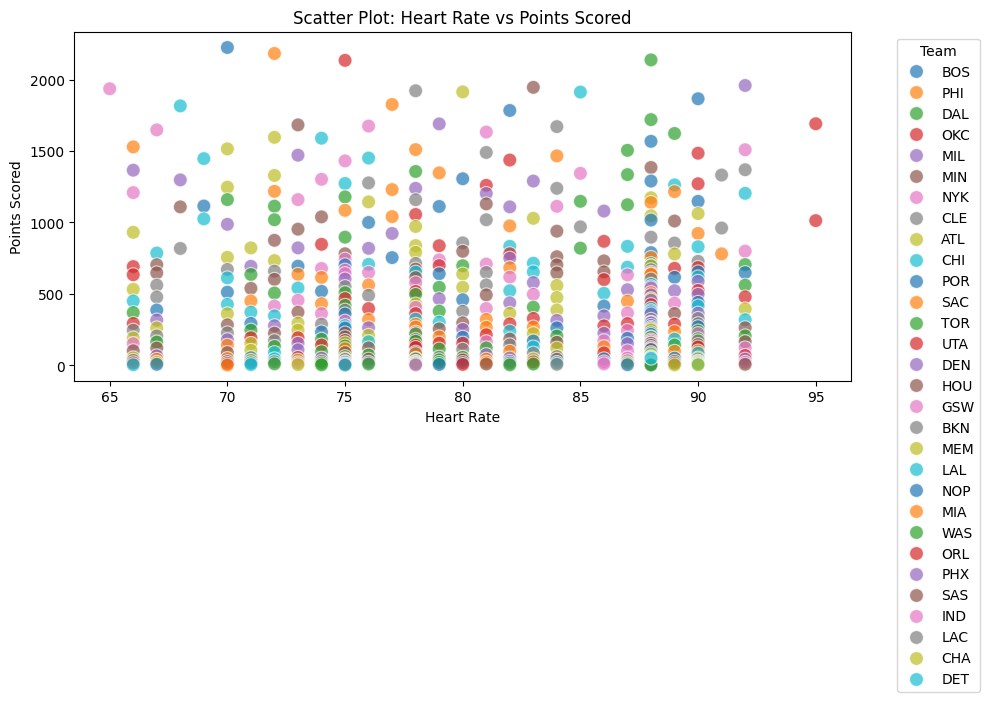

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=data['HR'],y=data['PTS'],hue=data['Team'],palette='tab10',s=100,alpha=0.7
)
plt.title("Scatter Plot: Heart Rate vs Points Scored")
plt.xlabel("Heart Rate")
plt.ylabel("Points Scored")
plt.legend(title="Team",bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

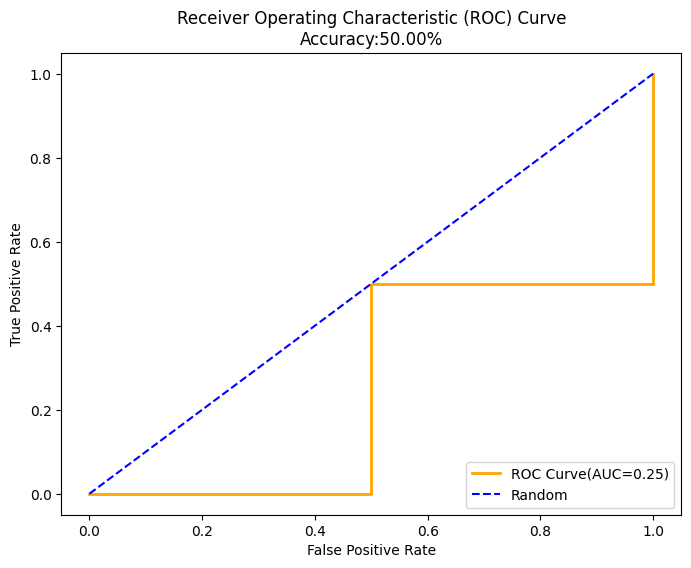

In [34]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='orange',lw=2,label=f"ROC Curve(AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='Random')
plt.title(f"Receiver Operating Characteristic (ROC) Curve\nAccuracy:{accuracy:.2%}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [35]:
team_features['Win_Prob'] = rf_model.predict_proba(X)[:, 1]

C:\Users\Student\AppData\Local\Temp\ipykernel_14060\38163230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


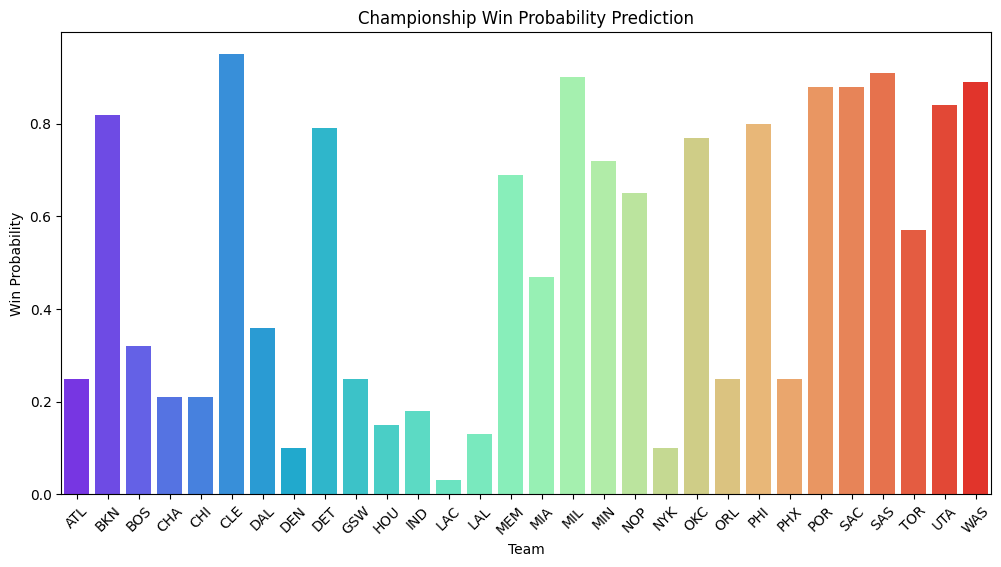

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=team_features['Team'],
    y=team_features['Win_Prob'],
    palette=sns.color_palette("rainbow", n_colors=len(team_features))
)
plt.title("Championship Win Probability Prediction")
plt.xlabel("Team")
plt.ylabel("Win Probability")
plt.xticks(rotation=45)
plt.show()